This notebook contains the work for Step 3 of the Data Science Method:

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
<b>3.   Exploratory Data Analysis
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features</b>

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import chi2_contingency

In [7]:
# set options
pd.set_option('display.max_rows', 1500)

In [2]:
# load the data saved from step 2
df=pd.read_csv('data\step2_output.csv')
df.head()

C:\Users\Nancy\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SCHEDNUM_x  RECEPTION_NUM INSTRUMENT  SALE_YEAR  SALE_MONTHDAY  \
0  14101001000     2008138043         WD       2008            703   
1  14101001000     2009074518         WD       2009            605   
2  14101001000     2015157653         WD       2015           1102   
3  14101001000     2009002129         WD       2008           1024   
4  14101002000     2010094573         WD       2010            823   

   RECEPTION_DATE  SALE_PRICE                GRANTOR                GRANTEE  \
0        20081008        10.0       ATKINSON,RUSSELL     DREAM BUILDERS LLC   
1        20090615    299000.0       ATKINSON,RUSSELL  PADBURY,CHRISTOPHER R   
2        20151109    415000.0  PADBURY,CHRISTOPHER R   MACIEL,HORACIO PEREZ   
3        20090108        10.0     DREAM BUILDERS LLC       ATKINSON,RUSSELL   
4        20100824    350000.0       SHEARON,MARK H &         EFREM,TEWEDROS   

  CLASS  ...  UNITS  ASMT_APPR_LAND TOTAL_VALUE  ASDLAND ASSESS_VALUE  \
0     R  ...      1          103000      530200     7365        37910   
1     R  ...      1          103000      530200     7365        37910   
2     R  ...      1          103000      530200     7365        37910   
3     R  ...      1          103000      530200     7365        37910   
4     R  ...      1           90400      572600     6464        40941   

   ASMT_TAXABLE  ASMT_EXEMPT_AMT  NBHD_1_y     NBHD_1_CN_y  \
0         37920                0         5  N GREEN VALLEY   
1         37920                0         5  N GREEN VALLEY   
2         37920                0         5  N GREEN VALLEY   
3         37920                0         5  N GREEN VALLEY   
4         40940                0         5  N GREEN VALLEY   

                    LEGL_DESCRIPTION  
0  GREEN VALLEY RANCH FLG #36 B1  L1  
1  GREEN VALLEY RANCH FLG #36 B1  L1  
2  GREEN VALLEY RANCH FLG #36 B1  L1  
3  GREEN VALLEY RANCH FLG #36 B1  L1  
4  GREEN VALLEY RANCH FLG #36 B1  L2  

[5 rows x 61 columns]

# Build data profile tables and plots 

In [4]:
# Print out the summary stats table
df.describe().T

count          mean           std           min  \
SCHEDNUM_x       141595.0  3.702781e+11  2.305327e+11  1.410100e+10   
RECEPTION_NUM    141595.0  2.014260e+09  2.307763e+07  2.013007e+08   
SALE_YEAR        141595.0  2.014118e+03  3.506286e+00  2.008000e+03   
SALE_MONTHDAY    141595.0  6.699884e+02  3.289384e+02  1.010000e+02   
RECEPTION_DATE   141595.0  2.014221e+07  3.506930e+04  1.969123e+07   
SALE_PRICE       141595.0  3.130446e+05  3.701043e+05  1.000000e+00   
MKT_CLUS         141593.0  1.644858e+01  9.743126e+00  1.000000e+00   
D_CLASS          141595.0  1.145855e+02  1.905817e+00  1.120000e+02   
NBHD_1_x         141595.0  3.780931e+02  2.442278e+02  1.000000e+00   
PIN              141595.0  1.616411e+08  9.657834e+05  1.604339e+08   
SCHEDNUM_y       141595.0  3.702781e+11  2.305327e+11  1.410100e+10   
CD               141595.0  1.000000e+00  0.000000e+00  1.000000e+00   
OFCARD           141595.0  1.001144e+00  3.831031e-02  1.000000e+00   
SITE_NBR         141595.0  3.846210e+03  4.180076e+03  1.000000e+00   
PROP_CLASS       141595.0  1.115681e+03  1.730364e+02  1.112000e+03   
LAND_SQFT        141576.0  6.518765e+03  2.813524e+03  0.000000e+00   
AREA_ABG         141595.0  1.570351e+03  8.238896e+02  2.260000e+02   
BSMT_AREA        141595.0  6.706188e+02  5.695522e+02  0.000000e+00   
FBSMT_SQFT       141595.0  4.567147e+02  5.079144e+02  0.000000e+00   
GRD_AREA         141595.0  3.387335e+01  1.470222e+02  0.000000e+00   
STORY            141595.0  1.384180e+00  5.298641e-01  1.000000e+00   
BED_RMS          141595.0  2.820333e+00  8.238471e-01  0.000000e+00   
FULL_B           141595.0  2.136368e+00  9.321437e-01  0.000000e+00   
HLF_B            141595.0  3.592500e-01  5.215098e-01  0.000000e+00   
CCYRBLT          141595.0  1.955779e+03  3.608327e+01  1.873000e+03   
CCAGE_RM         141595.0  1.146167e+03  9.952066e+02  0.000000e+00   
UNITS            141595.0  1.028864e+00  2.929437e-01  0.000000e+00   
ASMT_APPR_LAND   141595.0  2.344318e+05  1.975790e+05  0.000000e+00   
TOTAL_VALUE      141595.0  5.715797e+05  3.969683e+05  4.400000e+04   
ASDLAND          141595.0  1.676285e+04  1.412949e+04  0.000000e+00   
ASSESS_VALUE     141595.0  4.086974e+04  2.838687e+04  3.146000e+03   
ASMT_TAXABLE     141595.0  4.084765e+04  2.839322e+04  0.000000e+00   
ASMT_EXEMPT_AMT  141595.0  2.307529e+01  1.212331e+03  0.000000e+00   
NBHD_1_y         141595.0  3.780931e+02  2.442278e+02  1.000000e+00   

                          25%           50%           75%           max  
SCHEDNUM_x       1.324050e+11  5.053150e+11  5.272230e+11  9.145050e+11  
RECEPTION_NUM    2.011124e+09  2.014157e+09  2.017101e+09  1.000000e+10  
SALE_YEAR        2.011000e+03  2.014000e+03  2.017000e+03  2.020000e+03  
SALE_MONTHDAY    4.120000e+02  6.290000e+02  9.260000e+02  1.231000e+03  
RECEPTION_DATE   2.011110e+07  2.014123e+07  2.017080e+07  2.020052e+07  
SALE_PRICE       8.567550e+04  2.650000e+05  4.300000e+05  4.950000e+07  
MKT_CLUS         8.000000e+00  1.600000e+01  2.400000e+01  5.400000e+01  
D_CLASS          1.130000e+02  1.140000e+02  1.170000e+02  1.190000e+02  
NBHD_1_x         1.320000e+02  5.120000e+02  5.810000e+02  9.060000e+02  
PIN              1.608683e+08  1.614606e+08  1.619848e+08  1.643503e+08  
SCHEDNUM_y       1.324050e+11  5.053150e+11  5.272230e+11  9.145050e+11  
CD               1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
OFCARD           1.000000e+00  1.000000e+00  1.000000e+00  5.000000e+00  
SITE_NBR         1.401000e+03  2.828000e+03  4.580000e+03  2.168000e+04  
PROP_CLASS       1.112000e+03  1.112000e+03  1.112000e+03  9.279000e+03  
LAND_SQFT        4.846000e+03  6.250000e+03  7.380000e+03  2.820000e+05  
AREA_ABG         1.000000e+03  1.306000e+03  1.904500e+03  1.677800e+04  
BSMT_AREA        0.000000e+00  7.470000e+02  1.058000e+03  8.712000e+03  
FBSMT_SQFT       0.000000e+00  3.160000e+02  8.510000e+02  8.276000e+03  
GRD_AREA         0.000000e+00  0.000000e+00  0.000000e

<font color='teal'>**Create a Pearson correlation heatmap**</font>

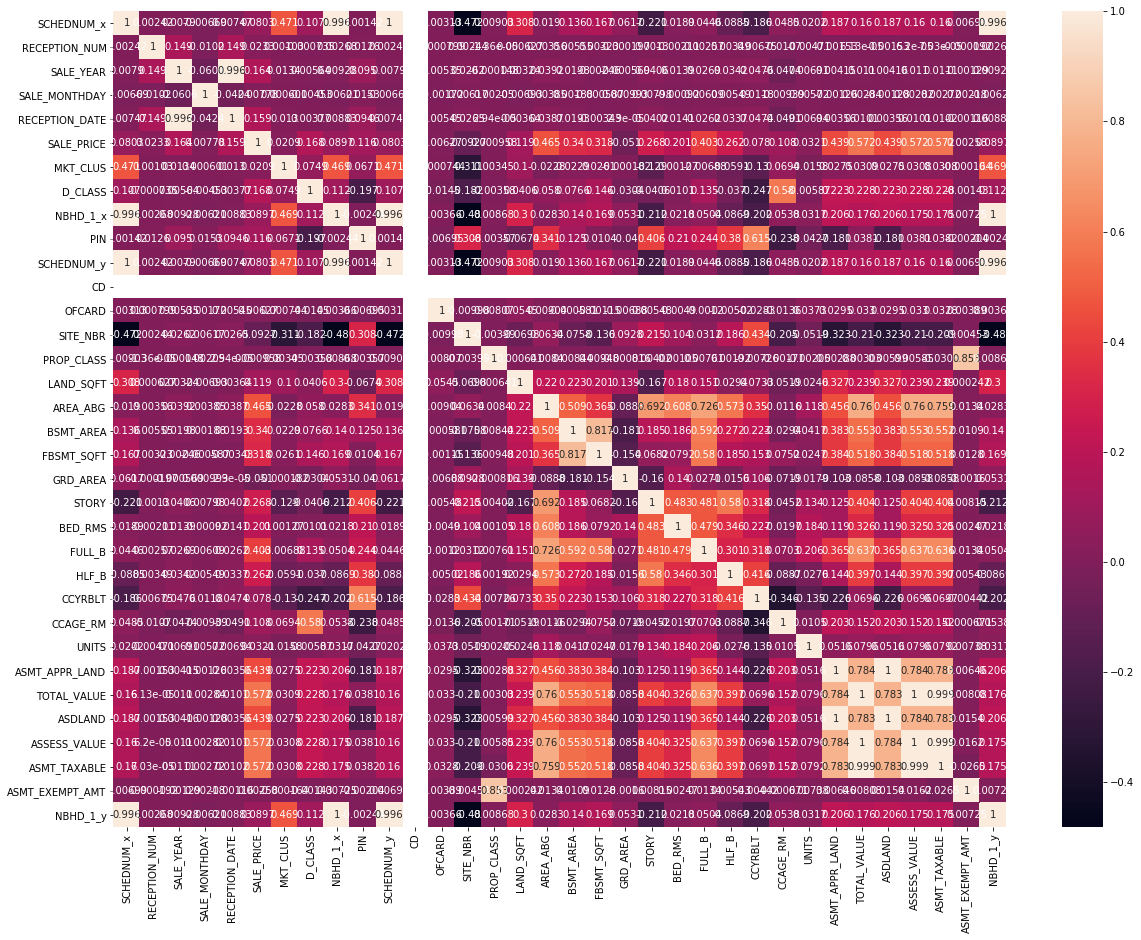

In [5]:
# calculate the correlation matrix
corr = df.corr()

plt.subplots(figsize=(20,15))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')

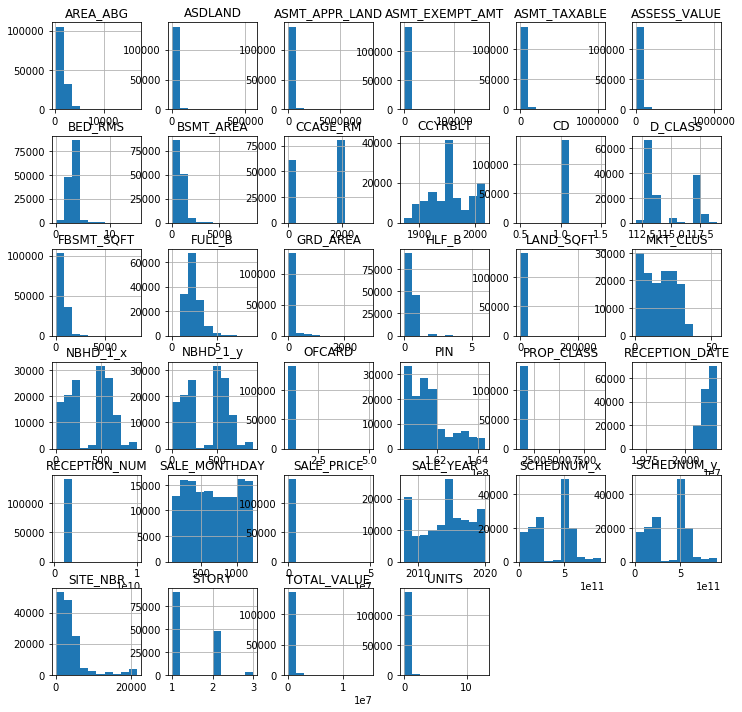

In [6]:
# print histograms
df.hist(bins=10, figsize=(12,12),sharey=False, sharex=False)
plt.show()

## Anamolies & outliers

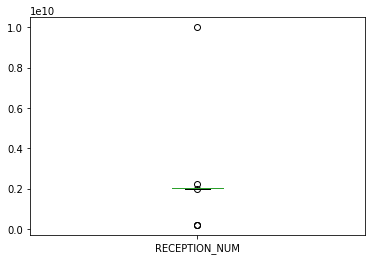

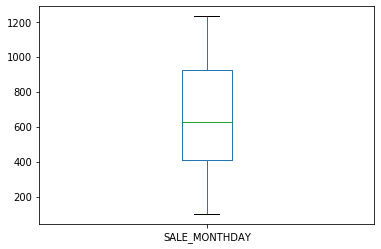

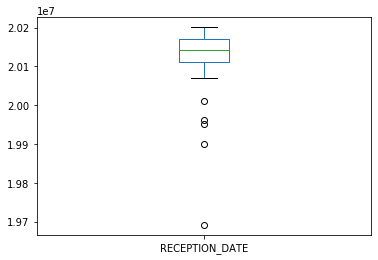

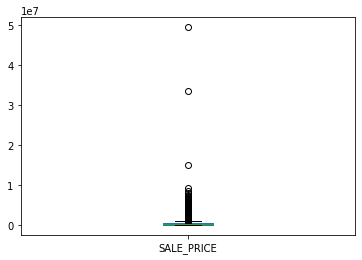

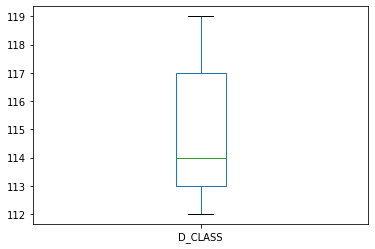

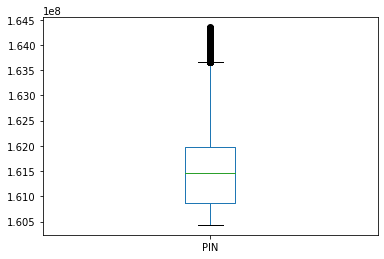

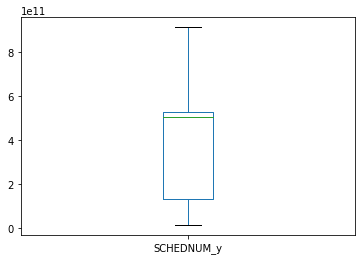

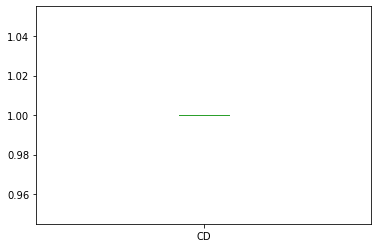

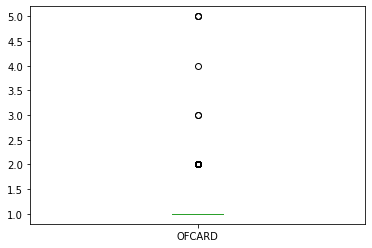

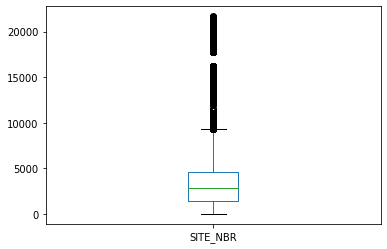

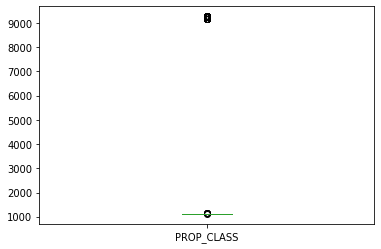

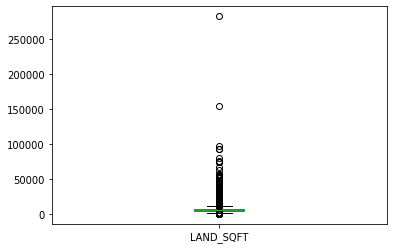

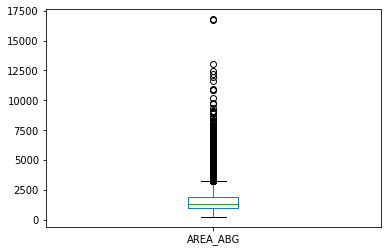

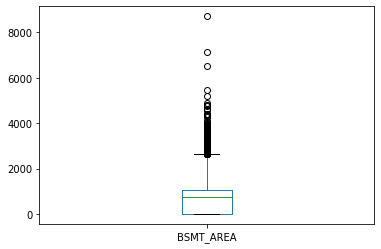

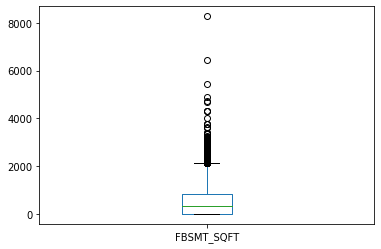

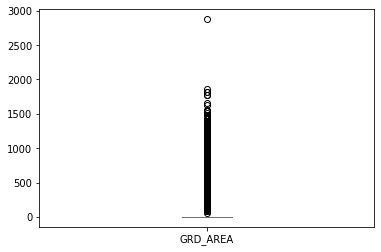

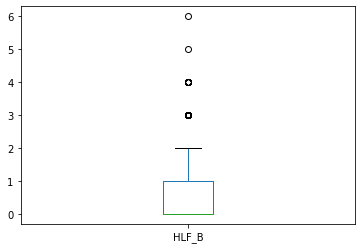

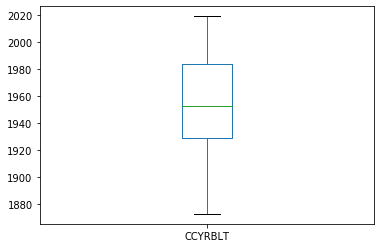

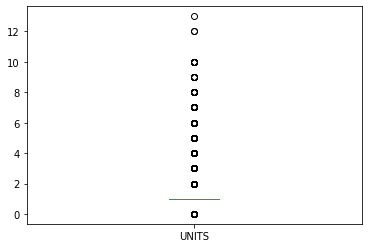

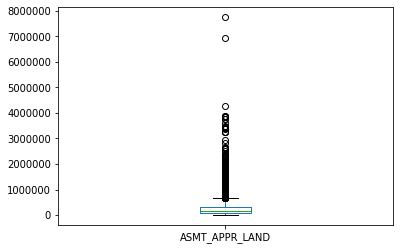

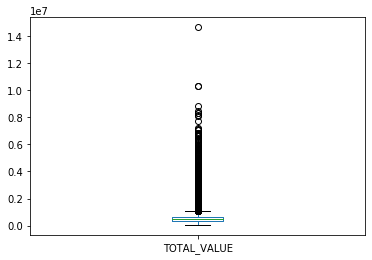

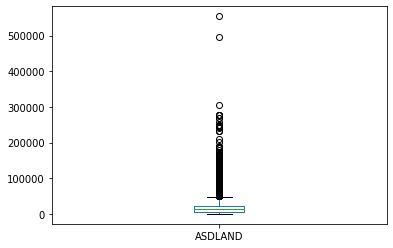

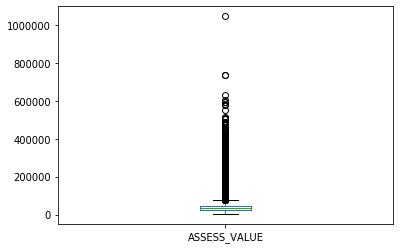

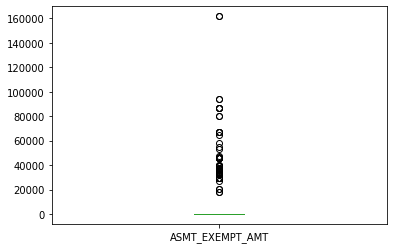

In [7]:
# Create boxplots for all of the columns
for col in df.columns:
    # check if col is numeric
    if np.issubdtype(df[col].dtype, np.number):
        df[col].plot(kind='box')
        plt.show()

# Check out some of the data

In [8]:
# check out neighborhood codes

print(df.groupby(['NBHD_1_CN_x','NBHD_1_CN_y']).size())

NBHD_1_CN_x        NBHD_1_CN_y      
ACADEMY            ACADEMY               116
ARAPAHOE SQUARE    ARAPAHOE SQUARE        28
ATHMAR PARK        ATHMAR PARK          2388
AVONDALE           AVONDALE              358
BAKER              BAKER                 767
BARNUM             BARNUM               3111
BEAR VALLEY        BEAR VALLEY          1149
BELCARO            BELCARO               201
BELMONT HTS        BELMONT HTS           188
BERKELEY           BERKELEY             3113
BISCAYNE           BISCAYNE              117
BONNIE BRAE        BONNIE BRAE           632
BREAKERS           BREAKERS              130
C GREEN VALLEY     C GREEN VALLEY       1299
CAPITOL HILL       CAPITOL HILL          147
CAPITOL HILL S     CAPITOL HILL S        266
CENTRAL PARK       CENTRAL PARK           35
CHAFFEE PARK       CHAFFEE PARK         1494
CHEESMAN PARK      CHEESMAN PARK         430
CHERMONT           CHERMONT               67
CHERRY CREEK       CHERRY CREEK           93
CHERRY POINT      

In [8]:
df.loc[np.logical_and(df['CCYRBLT'] == 1880 , df['SALE_YEAR'] == 2008)].T

38251                      61494
SCHEDNUM_x                         213301008000               232118011000
RECEPTION_NUM                        2008156219                 2008057346
INSTRUMENT                                   WD                         WD
SALE_YEAR                                  2008                       2008
SALE_MONTHDAY                              1013                        425
RECEPTION_DATE                         20081117                   20080428
SALE_PRICE                                33000                     159900
GRANTOR              AEGIS MORTGAGE CORPORATION              MENDEZ,ALVARO
GRANTEE                         PRINCE,YONG CHA        MCNEIRNEY,PATRICK &
CLASS                                         R                          R
MKT_CLUS                                      5                          7
D_CLASS                                     113                        113
D_CLASS_CN_x                      SINGLE FAMILY              SINGLE FAMILY
NBHD_1_x                                    201                        250
NBHD_1_CN_x                         SWANSEA (N)             JEFFERSON PARK
PIN                                   160638528                  160926167
SCHEDNUM_y                         213301008000               232118011000
CD                                            1                          1
OFCARD                                        1                          1
OWNER                            RIDGELY,EMILY         MCNEIRNEY,PATRICK  
CO_OWNER                                    NaN                        NaN
OWNER_NUM                                5110                       603   
OWNER_DIR                                   NaN                        NaN
OWNER_ST                             SAINT PAUL                          F
OWNER_TYPE                                   ST                         ST
OWNER_APT                                   NaN                        NaN
OWNER_CITY                               DENVER                     SALIDA
OWNER_STATE                                  CO                         CO
OWNER_ZIP                            80216-2337                 81201-2606
SITE_NBR                                   5110                       2723
SITE_DIR                                      N                          W
SITE_NAME                            SAINT PAUL                       23RD
SITE_MODE                                    ST                        AVE
SITE_MORE                                   NaN                        NaN
TAX_DIST                                 DENVER                     DENVER
PROP_CLASS                                 1112                       1112
PROPERTY_CLASS        Single Family Residential  Single Family Residential
ZONE10                             E-SU-D                     G-MU-3      
D_CLASS_CN_y                      SINGLE FAMILY              SINGLE FAMILY
LAND_SQFT                                  6350                       3120
AREA_ABG                                    919                        663
BSMT_AREA                                     0                          0
FBSMT_SQFT                                    0                          0
GRD_AREA                                      0                          0
STORY                                         1                          1
STYLE_CN                              ONE-STORY                  ONE-STORY
BED_RMS                                       2                          1
FULL_B                                        1                          1
HLF_B                                         0                          0
CCYRBLT                                    1880                       1880
CCAGE_RM                                   2001                          0
UNITS                                         1                          1
ASMT_APPR_LAND                            63400                    

In [9]:
# get list of architectural styles
print(df.groupby(['STYLE_CN']).size())

STYLE_CN
BI-LEVEL                    2018
CONVERSIONS                 1271
ONE AND HALF-STORY          7244
ONE-STORY                  81858
OTHER                          1
SPLIT LEVEL                  376
THREE-STORY                  769
TRI-LEVEL                   2903
TRI-LEVEL WITH BASEMENT     3338
TWO AND HALF-STORY          2070
TWO-STORY                  39747
dtype: int64


In [10]:
# get counts of property classes
print(df.groupby(['PROP_CLASS','PROPERTY_CLASS']).size())

PROP_CLASS  PROPERTY_CLASS            
1112        Single Family Residential     141526
1114        Rowhouses                          1
1150        Residential Partial Exempt         4
9159        Religious Worship                  2
9189        Parsonages                         8
9239        County Exempt                      1
9249        Political Subdivisions             8
9259        Religious Worship                 22
9279        Charitable                        23
dtype: int64


_==>Based on these counts, drop everything that is not Single Family Residential_

In [11]:
# MKT_CLUS is not listed on the metadata, check it out
print(df.groupby(['MKT_CLUS']).size())

MKT_CLUS
1.0     5475
2.0     6881
3.0     4293
4.0     3593
5.0     1832
6.0     7947
7.0     4778
8.0     4657
9.0     3022
10.0    3811
11.0    6333
12.0    3107
13.0    4287
14.0    3341
15.0    2612
16.0    5706
17.0    4411
18.0    2459
19.0    5286
20.0    2524
21.0    1759
22.0    7152
23.0    7664
24.0    5503
25.0    3452
26.0    3219
27.0    3624
28.0    2608
29.0    2571
30.0    4028
31.0    2628
32.0    6856
33.0    2115
34.0    2058
54.0       1
dtype: int64


## Pair Plot


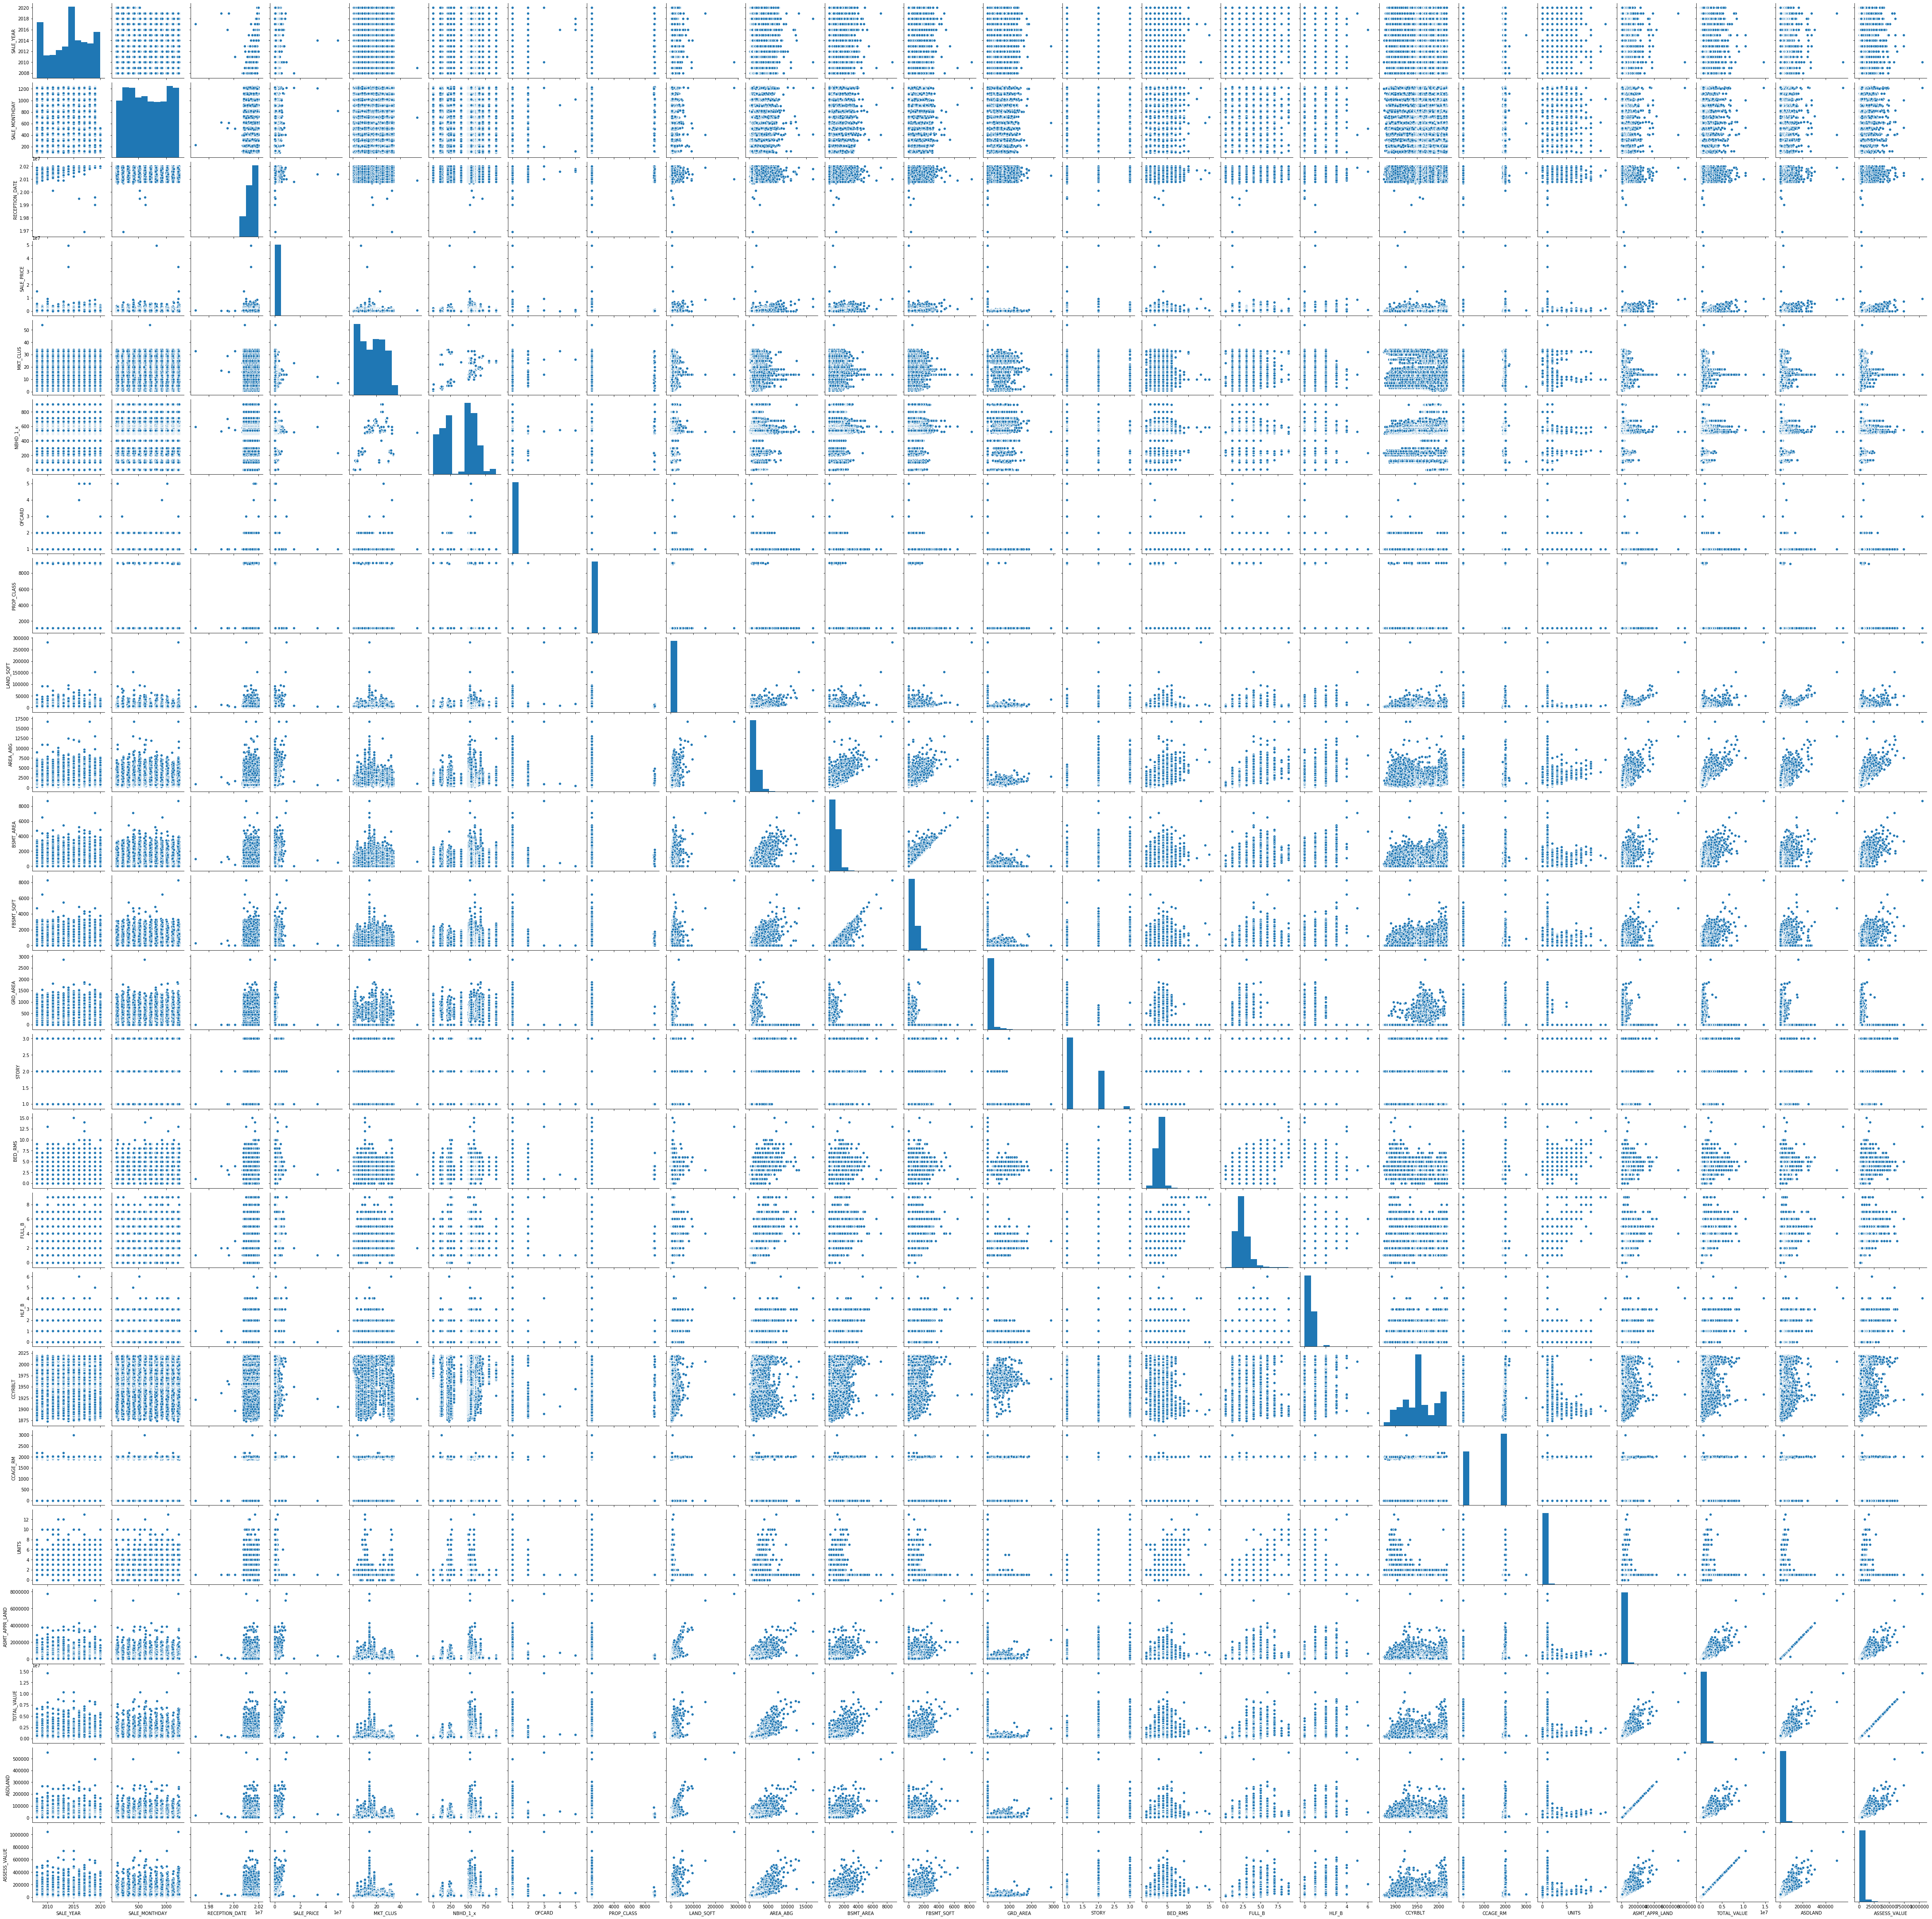

In [12]:
# run pair plots only on columns of interest
sns.pairplot(df[['SALE_YEAR', 'SALE_MONTHDAY', 'RECEPTION_DATE', 'SALE_PRICE', 'MKT_CLUS', 'NBHD_1_x', 'OFCARD', 'TAX_DIST', 'PROP_CLASS', 'ZONE10', 'LAND_SQFT', 'AREA_ABG', 'BSMT_AREA', 'FBSMT_SQFT', 'GRD_AREA', 'STORY', 'STYLE_CN', 'BED_RMS', 'FULL_B', 'HLF_B', 'CCYRBLT', 'CCAGE_RM', 'UNITS', 'ASMT_APPR_LAND', 'TOTAL_VALUE', 'ASDLAND', 'ASSESS_VALUE']])

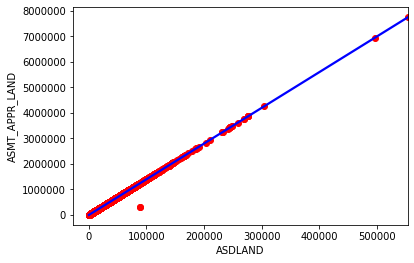

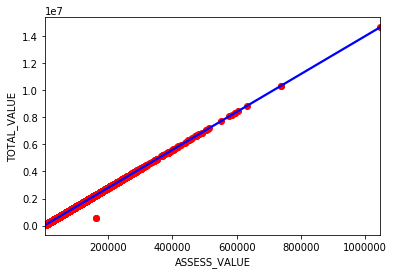

In [13]:
# create individual scatter plots of highly correlated fields
# look at Assessed Land Value vs Actual Land Value
plt.scatter(df['ASDLAND'], df['ASMT_APPR_LAND'],  color='red', marker='o')
sns.regplot(x='ASDLAND', y='ASMT_APPR_LAND', data=df, color='blue', scatter=None, label='First Order')
plt.show()

# look at Assessed Value vs Actual Total Value
plt.scatter(df['ASSESS_VALUE'], df['TOTAL_VALUE'],  color='red', marker='o')
sns.regplot(x='ASSESS_VALUE', y='TOTAL_VALUE', data=df, color='blue', scatter=None, label='First Order')
plt.show()


Assessed values are a straight percentage (7.2% for residential properties) of the actual value. So, only the actual fields are needed for modeling. 

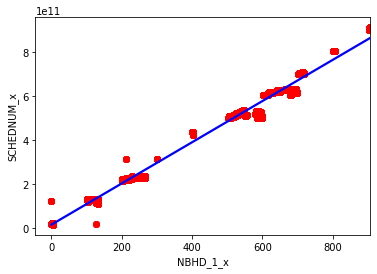

In [14]:
# check relationship between schednum and nbhd
#df.groupby(['NBHD_1_x']).agg({'SCHEDNUM_x': [np.min,np.max,'count']})
# look at Assessed Value vs Actual Total Value
plt.scatter(df['NBHD_1_x'], df['SCHEDNUM_x'],  color='red', marker='o')
sns.regplot(x='NBHD_1_x', y='SCHEDNUM_x', data=df, color='blue', scatter=None, label='First Order')
plt.show()

In [15]:
# drop the fields that were duplicated in the two input tables (NBHD_1_y, SCHEDNUM_y)
df=df.drop(['NBHD_1_y','SCHEDNUM_y'],axis=1)

In [16]:
# create an improvement value, so that land value can be used as an independent input
df['IMPROVE_VALUE']=df['TOTAL_VALUE']-df['ASMT_APPR_LAND']

In [17]:
# save 
df.to_csv('data\step3_output.csv', index = False)